   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
Mean Squared Error: 1825912.9915253494
R-squared: 0.8851397433679631


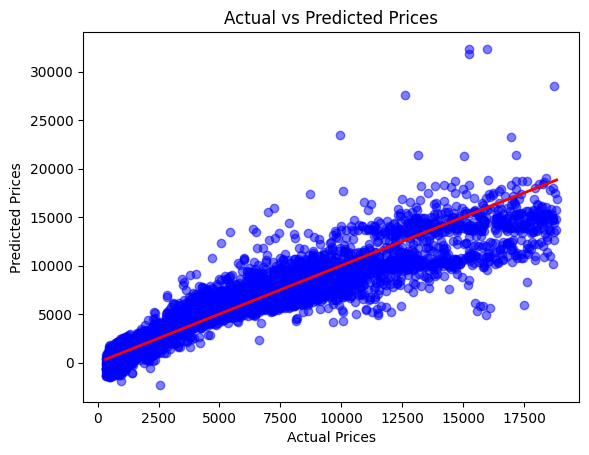

Task in-hand: Regression


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'diamonds.csv'  
df = pd.read_csv(file_path)
print(df.head())

print(df.isnull().sum())

categorical_features = ['cut', 'color', 'clarity']
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

X = df.drop('price', axis=1)  
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

print("Task in-hand: Regression")


In [2]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nColumns in the dataset:")
print(df.columns)

X = df.drop('price', axis=1)  
y = df['price']  

print("\nPredictor variables (X):")
print(X.columns)

print("\nTarget variable (y): 'price'")

print(f"\nShape of Predictors (X): {X.shape}")
print(f"Shape of Target (y): {y.shape}")


First 5 rows of the dataset:
   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

Columns in the dataset:
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

Predictor variables (X):
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

Target variable (y): 'price'

Shape of Predictors (X): (53940, 9)
Shape of Target (y): (53940,)


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

print("First 5 rows of the dataset:")
print(df.head())

print("\nMissing values in the dataset:")
print(df.isnull().sum())

numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']  
categorical_features = ['cut', 'color', 'clarity'] 
standard_scaler = StandardScaler()
df[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

print("\nNumerical features after Standardization:")
print(df[numerical_features].head())

normalizer = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_features] = normalizer.fit_transform(df_normalized[numerical_features])

print("\nNumerical features after Normalization:")
print(df_normalized[numerical_features].head())

one_hot_encoder = OneHotEncoder(sparse_output=False)  
categorical_encoded = one_hot_encoder.fit_transform(df[categorical_features])

encoded_df = pd.DataFrame(categorical_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_features))
df_one_hot = pd.concat([df.reset_index(drop=True), encoded_df], axis=1).drop(columns=categorical_features)

print("\nData after One Hot Encoding (first 5 rows):")
print(df_one_hot.head())


X = df_one_hot.drop('price', axis=1) 
y = df_one_hot['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


First 5 rows of the dataset:
   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

Missing values in the dataset:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Numerical features after Standardization:
      carat     depth     table         x         y         z
0 -1.198168 -0.174092 -1.099672 -1.587837 -1.536196 -1.571129
1 -1.240361 -1.360738  1.585529 -1.641325 -1.658774 -1.741175
2 -1.198168 -3.385019  3.375663 -1.498691 -1.457395 -1.741175
3 -1.071587  0.454133  0.242928 -1.364971 -1.317305 -1.287720
4 -1.029394  1.082358  0.2429

In [4]:

algorithm_mapping = {
    'Algorithm': [
        'Principal Component Analysis',  
        'Linear Regression',              
        'KNN Regression',                
        'TF IDF',                         
        'Logistic Regression'           
    ],
    'Task Type': [
        'Dimensionality Reduction',  
        'Regression',                
        'Regression',               
        'Classification',            
        'Classification'            
    ]
}

df_mapping = pd.DataFrame(algorithm_mapping)

print("Algorithm Mapping to Tasks:")
print(df_mapping)

correct_mappings = {
    'Principal Component Analysis': 'Dimensionality Reduction',
    'Linear Regression': 'Regression',
    'KNN Regression': 'Regression',
    'TF IDF': 'Classification',
    'Logistic Regression': 'Classification'
}

for algorithm, task in correct_mappings.items():
    print(f"Algorithm: {algorithm} | Task Type: {task}")


Algorithm Mapping to Tasks:
                      Algorithm                 Task Type
0  Principal Component Analysis  Dimensionality Reduction
1             Linear Regression                Regression
2                KNN Regression                Regression
3                        TF IDF            Classification
4           Logistic Regression            Classification
Algorithm: Principal Component Analysis | Task Type: Dimensionality Reduction
Algorithm: Linear Regression | Task Type: Regression
Algorithm: KNN Regression | Task Type: Regression
Algorithm: TF IDF | Task Type: Classification
Algorithm: Logistic Regression | Task Type: Classification


In [5]:
dimensionality = df.shape  

print(f"The dimensionality of the dataset is: {dimensionality[1]} features (columns) and {dimensionality[0]} samples (rows).")


The dimensionality of the dataset is: 10 features (columns) and 53940 samples (rows).


In [6]:

numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']  
categorical_features = ['cut', 'color', 'clarity']  

standard_scaler = StandardScaler()
df[numerical_features] = standard_scaler.fit_transform(df[numerical_features])
one_hot_encoder = OneHotEncoder(sparse_output=False)
categorical_encoded = one_hot_encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(categorical_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_features))
df_encoded = pd.concat([df.reset_index(drop=True), encoded_df], axis=1).drop(columns=categorical_features)

X = df_encoded.drop('price', axis=1)  
y = df_encoded['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_columns_count = X_train.select_dtypes(include=['float64', 'int64']).shape[1]

print(f"The number of numerical columns in X_train is: {numerical_columns_count}")


The number of numerical columns in X_train is: 26


In [7]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']  
categorical_features = ['cut', 'color', 'clarity'] 

standard_scaler = StandardScaler()
df[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

one_hot_encoder = OneHotEncoder(sparse_output=False) 
categorical_encoded = one_hot_encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(categorical_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_features))
df_encoded = pd.concat([df.reset_index(drop=True), encoded_df], axis=1).drop(columns=categorical_features)

X = df_encoded.drop('price', axis=1)  
y = df_encoded['price']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns_count = len(categorical_features)

print(f"The number of categorical columns in X_train is: {categorical_columns_count}")


The number of categorical columns in X_train is: 3


In [8]:
mean_price = df['price'].mean()
median_price = df['price'].median()
min_depth = df['depth'].min()
std_carat = df['carat'].std()
total_data_points = df.shape[0]

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Minimum Depth: {min_depth}")
print(f"Standard Deviation of Carat: {std_carat}")
print(f"Total Data Points: {total_data_points}")


Mean Price: 3932.799721913237
Median Price: 2401.0
Minimum Depth: -13.087602738397585
Standard Deviation of Carat: 1.0000092696876581
Total Data Points: 53940


In [9]:
cut_cardinality = df['cut'].nunique()
color_cardinality = df['color'].nunique()
clarity_cardinality = df['clarity'].nunique()

print(f"Cardinality of cut column: {cut_cardinality}")
print(f"Cardinality of color column: {color_cardinality}")
print(f"Cardinality of clarity column: {clarity_cardinality}")

Cardinality of cut column: 5
Cardinality of color column: 7
Cardinality of clarity column: 8


In [10]:

total_data_points = 53940

train_70_30 = int(0.7 * total_data_points)
test_70_30 = total_data_points - train_70_30

train_75_25 = int(0.75 * total_data_points)
test_75_25 = total_data_points - train_75_25

train_80_20 = int(0.8 * total_data_points)
test_80_20 = total_data_points - train_80_20

print(f"70-30 split: Training Data Points: {train_70_30}, Test Data Points: {test_70_30}")
print(f"75-25 split: Training Data Points: {train_75_25}, Test Data Points: {test_75_25}")
print(f"80-20 split: Training Data Points: {train_80_20}, Test Data Points: {test_80_20}")


70-30 split: Training Data Points: 37758, Test Data Points: 16182
75-25 split: Training Data Points: 40455, Test Data Points: 13485
80-20 split: Training Data Points: 43152, Test Data Points: 10788


In [12]:
numerical_columns = ['carat', 'depth', 'table'] 

scaler = StandardScaler()


X_train_num = df[numerical_columns]
X_train_scaled = scaler.fit_transform(X_train_num)

scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_columns)

mean_carat = scaled_df['carat'].mean()
std_depth = scaled_df['depth'].std()
median_table = scaled_df['table'].median()

print(f"Mean of carat column (after scaling): {mean_carat}")
print(f"Standard Deviation of depth column (after scaling): {std_depth}")
print(f"Median of table column (after scaling): {median_table}")

Mean of carat column (after scaling): -5.479899482317421e-17
Standard Deviation of depth column (after scaling): 1.0000092696876581
Median of table column (after scaling): -0.2046050914713867


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


X = df.drop('price', axis=1)  
y = df['price']               
X = pd.get_dummies(X, drop_first=True)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "KNN Regression": KNeighborsRegressor(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor()
}

mae_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)           
    predictions = model.predict(X_test)  
    mae = mean_absolute_error(y_test, predictions)  
    mae_results[model_name] = mae          
for model_name, mae in mae_results.items():
    print(f"{model_name}: MAE = {mae:.2f}")

best_model = min(mae_results, key=mae_results.get)
print(f"The model with the best MAE is: {best_model}")


Linear Regression: MAE = 858.71
KNN Regression: MAE = 385.28
Decision Tree Regression: MAE = 355.97
Random Forest Regression: MAE = 267.91
The model with the best MAE is: Random Forest Regression


In [14]:
import time

X = df.drop('price', axis=1)  
y = df['price']               

X = pd.get_dummies(X, drop_first=True)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "KNN Regression": KNeighborsRegressor(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor()
}

mae_results = {}
time_results = {}

for model_name, model in models.items():
    start_time = time.time()  
    model.fit(X_train, y_train) 
    training_time = time.time() - start_time  
    
    predictions = model.predict(X_test) 
    mae = mean_absolute_error(y_test, predictions)  
    
    mae_results[model_name] = mae  
    time_results[model_name] = training_time 
for model_name in models.keys():
    print(f"{model_name}: MAE = {mae_results[model_name]:.2f}, Training Time = {time_results[model_name]:.4f} seconds")

max_time_model = max(time_results, key=time_results.get)
print(f"The model that took the maximum time for training is: {max_time_model}")

Linear Regression: MAE = 858.71, Training Time = 0.0190 seconds
KNN Regression: MAE = 385.28, Training Time = 0.1109 seconds
Decision Tree Regression: MAE = 353.04, Training Time = 0.3487 seconds
Random Forest Regression: MAE = 268.31, Training Time = 18.9617 seconds
The model that took the maximum time for training is: Random Forest Regression


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

features = ['cut', 'color', 'clarity', 'carat']
target = 'price'

X = df[features]
y = df[target]

numerical_features = ['carat']
categorical_features = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")

if mae < 200:
    print("Error is below 200")
elif 200 <= mae < 400:
    print("Error is above 200 and below 400")
elif 400 <= mae < 750:
    print("Error is above 400 and below 750")
else:
    print("Error is above 750")


Mean Absolute Error: 311.35
Error is above 200 and below 400
